### Import libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.io as pio
import plotly.express as px
import wrds
pd.options.display.max_columns=200

### Connect WRDS

In [2]:
conn=wrds.Connection()

Enter your WRDS username [yjaey]: yjaeyoon
Enter your password: ···············


WRDS recommends setting up a .pgpass file.


Create .pgpass file now [y/n]?:  y


Created .pgpass file successfully.
Loading library list...
Done


### Download funda from Compustat

In [3]:
auditop_vars= conn.describe_table(library='audit', table='auditopin')['name']
print(len(auditop_vars))

Approximately 343544 rows in audit.auditopin.
225


In [4]:
vars_to_skip= ['matchfy', 'matchqu', 'closestfy', 'closestqu', 'priorqu', 'priorfy', 'note', 'opinion_text', 'eventdate']

In [5]:
for idx, var in enumerate(auditop_vars):
    if any(var_to_skip in var for var_to_skip in vars_to_skip):
        pass
    else:        
        print(idx, var)

0 audit_op_key
1 auditor_affil_fkey
2 auditor_affilname
3 auditor_fkey
4 auditor_name
5 sig_date_of_op_x
6 sig_date_of_op_s
7 going_concern
8 auditor_city
9 auditor_state
10 auditor_state_name
11 auditor_country
12 auditor_region
13 auditor_con_sup_reg
14 fiscal_year_of_op
15 fiscal_year_end_op
16 op_aud_pcaob
17 pcaob_reg_num
23 accnt_basis
24 ftp_file_fkey
25 form_fkey
26 file_date
27 file_accepted
28 file_size
29 http_name_html
30 http_name_text
31 company_fkey
32 best_edgar_ticker


In [6]:
df= conn.raw_sql(f"""select 
                        audit_op_key, 
                        auditor_fkey as afk,
                        auditor_name as afn,
                        going_concern as gco,
                        auditor_country as af_ctry,
                        fiscal_year_of_op,
                        form_fkey,
                        company_fkey as c,
                        best_edgar_ticker as t
                    from audit.auditopin
                    """)
print(df.shape)

(343544, 9)


In [7]:
vars_to_keep= ['audit_op_key', 'auditor_fkey', 'auditor_name', 'going_concern', 'auditor_country', 
               'fiscal_year_of_op', 'form_fkey', 'company_fkey', 'best_edgar_ticker']

In [8]:
df_test= conn.get_table(library= 'audit', table='auditopin',
                       columns= vars_to_keep,
                       obs= 3)
df_test

,audit_op_key,auditor_fkey,auditor_name,going_concern,auditor_country,fiscal_year_of_op,form_fkey,company_fkey,best_edgar_ticker
0,66900.0,5.0,Arthur Andersen LLP,0.0,USA,2000.0,10-K,0000000020,None
1,78252.0,5.0,Arthur Andersen LLP,0.0,USA,2001.0,10-K405,0000000020,None
2,3538.0,4.0,KPMG LLP,0.0,USA,2002.0,10-K,0000000020,None


In [9]:
df= conn.get_table(library= 'audit', table='auditopin',
                       columns= vars_to_keep)
print(df.shape)
df.head()

(343544, 9)


,audit_op_key,auditor_fkey,auditor_name,going_concern,auditor_country,fiscal_year_of_op,form_fkey,company_fkey,best_edgar_ticker
0,66900.0,5.0,Arthur Andersen LLP,0.0,USA,2000.0,10-K,0000000020,None
1,78252.0,5.0,Arthur Andersen LLP,0.0,USA,2001.0,10-K405,0000000020,None
2,3538.0,4.0,KPMG LLP,0.0,USA,2002.0,10-K,0000000020,None
3,39225.0,6.0,Grant Thornton LLP,0.0,USA,2003.0,10-K,0000000020,None
4,84748.0,6.0,Grant Thornton LLP,0.0,USA,2004.0,10-K,0000000020,None


In [10]:
df.rename(columns=
         {'auditor_fkey':'afk',
         'auditor_name':'afn',
         'going_concern':'gco',
         'auditor_country':'af_ctry',
         'fiscal_year_of_op':'fy',
         'company_fkey':'cik',
         'best_edgar_ticker':'tic'}, 
          inplace= True)

In [11]:
df.groupby(['afn','afk']).count().sort_values('cik', ascending=False).head(20)

,,audit_op_key,gco,af_ctry,fy,form_fkey,cik,tic
afn,afk,,,,,,,
Deloitte & Touche LLP,3.0,56507,56507,56326,56507,56507,56507,11497
Ernst & Young LLP,2.0,50808,50808,50627,50808,50808,50808,16659
PricewaterhouseCoopers LLP,1.0,50565,50565,50247,50565,50565,50565,13439
KPMG LLP,4.0,36703,36703,36570,36703,36703,36703,11808
Grant Thornton LLP,6.0,31512,31512,31506,31512,31511,31512,3188
Arthur Andersen LLP,5.0,6398,6398,6397,6398,6398,6398,901
BDO USA LLP,11761.0,3137,3137,3132,3137,3137,3137,1939
BDO Seidman LLP,7.0,2964,2964,2944,2964,2964,2964,675
MaloneBailey LLP,151.0,2552,2552,2550,2552,2552,2552,1044


In [12]:
df=df[df.fy>=2000]
df=df[df.fy<=2020]
df['big5']= (df['afk']<= 5).astype(int)
print(df.shape)
df.head()

(324416, 10)


,audit_op_key,afk,afn,gco,af_ctry,fy,form_fkey,cik,tic,big5
0,66900.0,5.0,Arthur Andersen LLP,0.0,USA,2000.0,10-K,0000000020,None,1
1,78252.0,5.0,Arthur Andersen LLP,0.0,USA,2001.0,10-K405,0000000020,None,1
2,3538.0,4.0,KPMG LLP,0.0,USA,2002.0,10-K,0000000020,None,1
3,39225.0,6.0,Grant Thornton LLP,0.0,USA,2003.0,10-K,0000000020,None,0
4,84748.0,6.0,Grant Thornton LLP,0.0,USA,2004.0,10-K,0000000020,None,0


<AxesSubplot:xlabel='fy'>

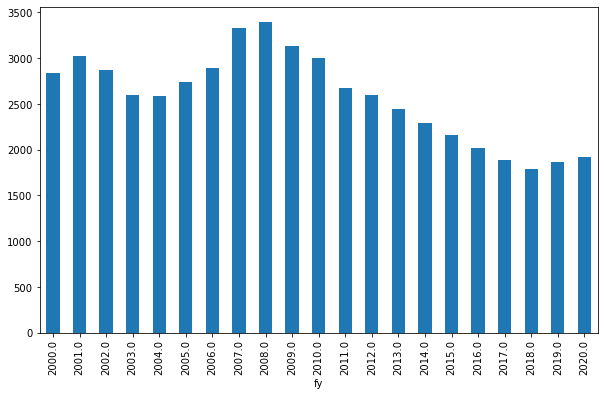

In [13]:
df[df.gco==1].groupby(['fy']).count()['cik'].plot(kind='bar', figsize=(10,6))

In [14]:
df.head()

,audit_op_key,afk,afn,gco,af_ctry,fy,form_fkey,cik,tic,big5
0,66900.0,5.0,Arthur Andersen LLP,0.0,USA,2000.0,10-K,0000000020,None,1
1,78252.0,5.0,Arthur Andersen LLP,0.0,USA,2001.0,10-K405,0000000020,None,1
2,3538.0,4.0,KPMG LLP,0.0,USA,2002.0,10-K,0000000020,None,1
3,39225.0,6.0,Grant Thornton LLP,0.0,USA,2003.0,10-K,0000000020,None,0
4,84748.0,6.0,Grant Thornton LLP,0.0,USA,2004.0,10-K,0000000020,None,0


In [15]:
df_b6= df[df.afk<=6]
df_b6=df_b6[['afn', 'fy']]
df_b6.head()

,afn,fy
0,Arthur Andersen LLP,2000.0
1,Arthur Andersen LLP,2001.0
2,KPMG LLP,2002.0
3,Grant Thornton LLP,2003.0
4,Grant Thornton LLP,2004.0


In [16]:
df_b6.head(2)

,afn,fy
0,Arthur Andersen LLP,2000.0
1,Arthur Andersen LLP,2001.0


In [17]:
df_cross= pd.crosstab(df_b6.fy, df_b6.afn).reset_index()
df_cross.head()

afn,fy,Arthur Andersen LLP,Deloitte & Touche LLP,Ernst & Young LLP,Grant Thornton LLP,KPMG LLP,PricewaterhouseCoopers LLP
0,2000.0,2549,2884,3306,981,1998,3098
1,2001.0,2357,2724,2662,987,2154,2973
2,2002.0,196,3177,2863,955,2284,2875
3,2003.0,0,3232,3079,926,2295,3300
4,2004.0,0,2698,2785,1164,2175,2714


In [18]:
df_cross_melted= pd.melt(df_cross, id_vars='fy')
df_cross_melted.rename(columns={'value':'count'}, inplace= True)
df_cross_melted.head()

,fy,afn,count
0,2000.0,Arthur Andersen LLP,2549
1,2001.0,Arthur Andersen LLP,2357
2,2002.0,Arthur Andersen LLP,196
3,2003.0,Arthur Andersen LLP,0
4,2004.0,Arthur Andersen LLP,0


In [65]:
df_cross_melted['bubble_size']= df_cross_melted['count']
df_cross_melted.loc[df_cross_melted.bubble_size<=300, 'bubble_size']=300
df_cross_melted.head()


,fy,afn,count,bubble_size
0,2000.0,Arthur Andersen,2549,2549
1,2001.0,Arthur Andersen,2357,2357
2,2002.0,Arthur Andersen,196,300
3,2003.0,Arthur Andersen,0,300
4,2004.0,Arthur Andersen,0,300


In [66]:
df_cross_melted.afn= df_cross_melted.afn.str.replace(' LLP', '')
df_cross_melted.loc[df_cross_melted.afn == 'PricewaterhouseCoopers', 'afn']='PwC'

-----------
## Plot with animation

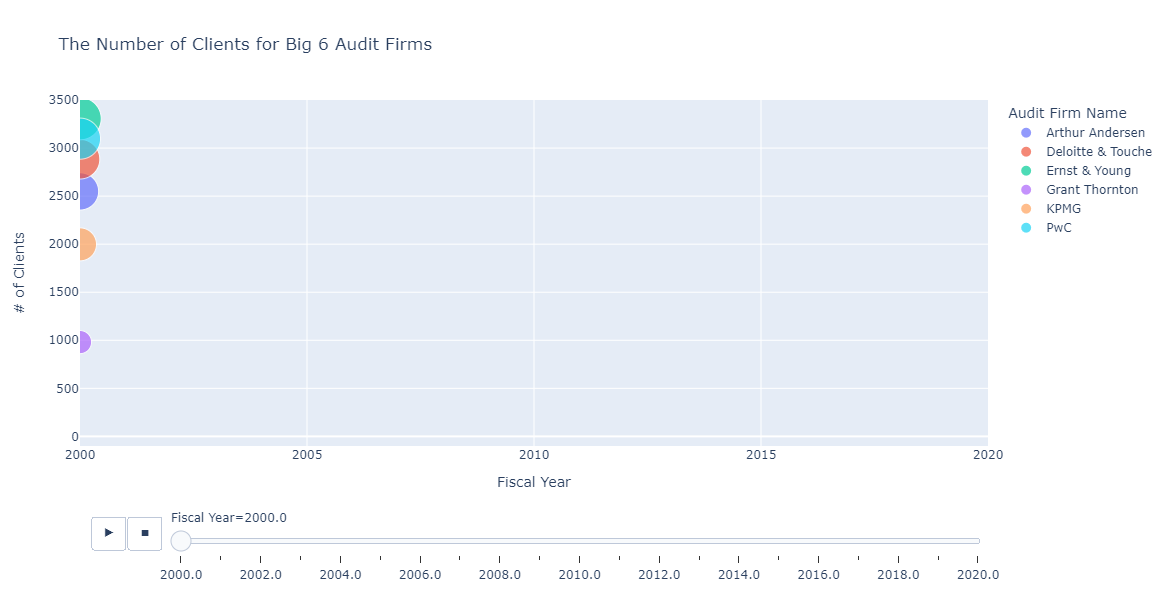

In [67]:
fig=px.scatter(df_cross_melted, x='fy', y='count',
               hover_name='afn',
               animation_frame='fy',
               animation_group='afn',
               color='afn',
               size='bubble_size',
               size_max=30,
               range_x= [2000,2020],
               range_y=[-100,3500],
               height=600,
               labels=dict(fy='Fiscal Year', count='# of Clients', afn='Audit Firm Name'),
               title="The Number of Clients for Big 6 Audit Firms"
              )

fig.show()

In [53]:
pio.write_html(fig, file='auditor-dist.html', auto_open=False, auto_play=False)

----------

## Plot without animnation

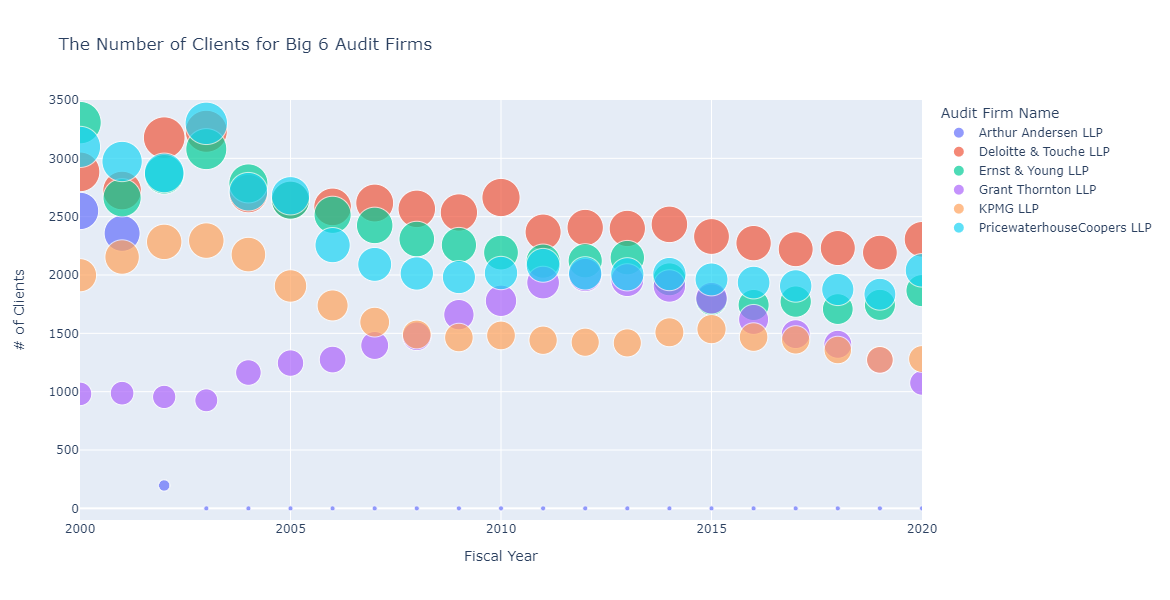

In [51]:
fig=px.scatter(df_cross_melted, x='fy', y='count',
               hover_name='afn',
               color='afn',
               size='bubble_size',
               size_max=30,
               range_x= [2000,2020],
               range_y=[-100,3500],
               height=600,
               labels=dict(fy='Fiscal Year', count='# of Clients', afn='Audit Firm Name'),
               title="The Number of Clients for Big 6 Audit Firms"
              )

fig.show()

-------------------